In [6]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the give file
product = pd.read_csv('Products.csv')
customer = pd.read_csv('Customers.csv')
transaction = pd.read_csv('Transactions.csv')

In [121]:
product

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


## EDA on the Product Table

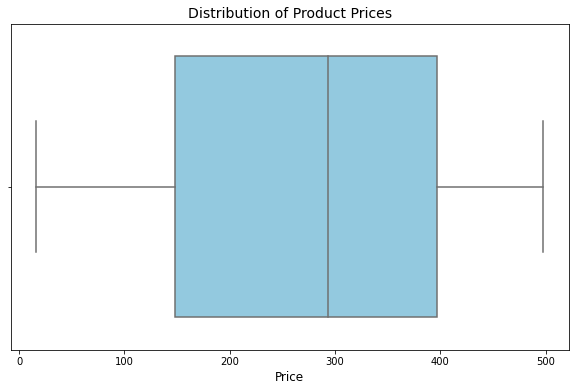

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=product['Price'], orient='h', color='skyblue')  # `orient='h'` makes it horizontal
plt.title('Distribution of Product Prices', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.show()

<Figure size 864x432 with 0 Axes>

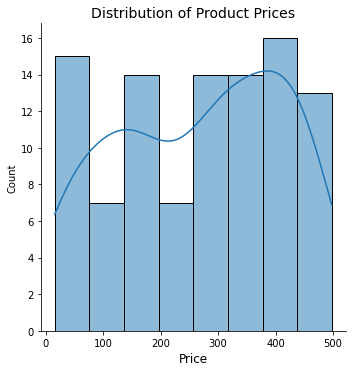

In [122]:
plt.figure(figsize=(12, 6))
sns.displot(product['Price'], kde=True)
plt.title('Distribution of Product Prices', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.show()

## EDA on the customer Table

In [124]:
customer

,CustomerID,CustomerName,Region,SignupDate,YearMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,2022-07
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022-02
2,C0003,Michael Rivera,South America,2024-03-07,2024-03
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022-10
4,C0005,Laura Weber,Asia,2022-08-15,2022-08
...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,2022-06
196,C0197,Christina Harvey,Europe,2023-03-21,2023-03
197,C0198,Rebecca Ray,Europe,2022-02-27,2022-02
198,C0199,Andrea Jenkins,Europe,2022-12-03,2022-12


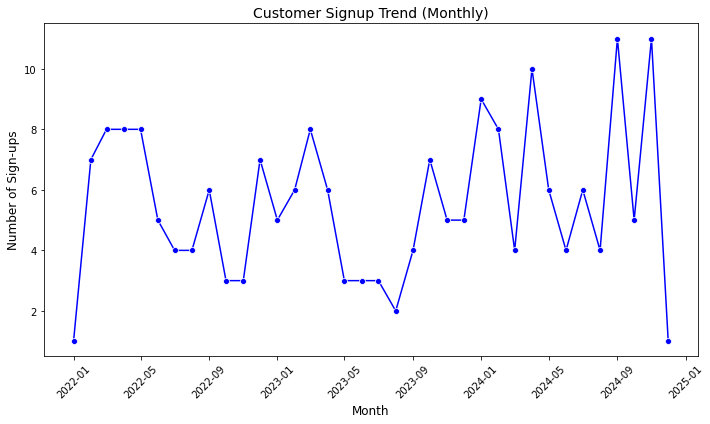

In [126]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])

customer['YearMonth'] = customer['SignupDate'].dt.to_period('M')

monthly_signup = customer.groupby('YearMonth')['CustomerID'].count().reset_index()
monthly_signup['YearMonth'] = monthly_signup['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='CustomerID', data=monthly_signup, marker='o', color='b')

plt.title('Customer Signup Trend (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sign-ups', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [133]:
grouped_region = customer.groupby('Region')['CustomerID'].count().reset_index()
grouped_region = grouped_region.rename(columns={'CustomerID': 'CustomerCount'})

In [135]:
grouped_region

,Region,CustomerCount
0,Asia,45
1,Europe,50
2,North America,46
3,South America,59


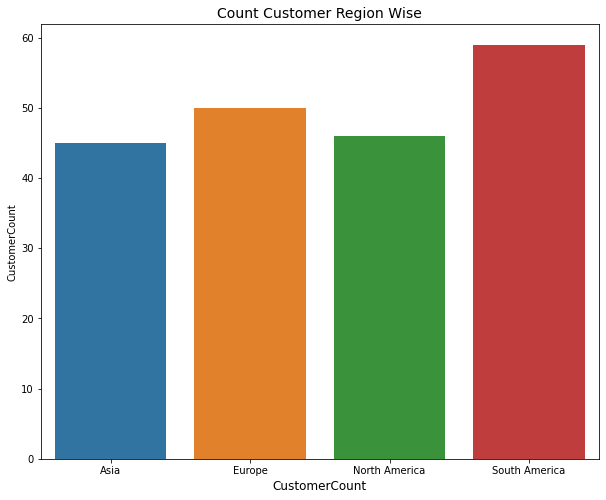

In [138]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Region', y='CustomerCount', data =grouped_region)
plt.title('Count Customer Region Wise', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.xlabel('CustomerCount',  fontsize=12)
plt.show()

## EDA on Overall Data After combining product, customer, transaction 

In [5]:
transaction

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [11]:
transaction['ProductID'].nunique()

100

In [12]:
transaction['CustomerID'].nunique()

199

In [15]:
df = transaction.merge(customer, on='CustomerID').merge(product, on='ProductID')

In [139]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94,2024-10
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-07
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-06
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-09


In [142]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
YearMonth          0
dtype: int64

In [143]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [17]:
df['Category'].nunique()

4

In [18]:
df['Region'].nunique()

4

In [22]:
# Check the month wise revenue
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['YearMonth'] = df['TransactionDate'].dt.to_period('M')

In [23]:
month_wise_total = df.groupby('YearMonth')['TotalValue'].sum().reset_index()
month_wise_total.columns = ['Month', 'TotalValue']
month_wise_total = month_wise_total.sort_values('Month')
print(month_wise_total)

      Month  TotalValue
0   2023-12     3769.52
1   2024-01    66376.39
2   2024-02    51459.27
3   2024-03    47828.73
4   2024-04    57519.06
5   2024-05    64527.74
6   2024-06    48771.18
7   2024-07    71366.39
8   2024-08    63436.74
9   2024-09    70603.75
10  2024-10    47063.22
11  2024-11    38224.37
12  2024-12    59049.20


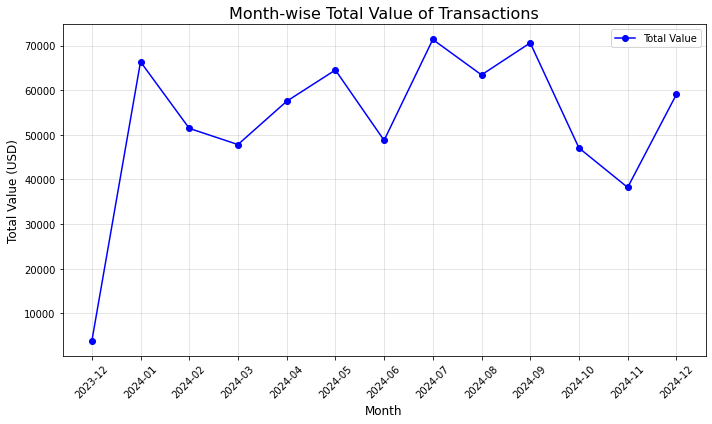

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(month_wise_total['Month'].astype(str), month_wise_total['TotalValue'], marker='o', color='blue', label='Total Value')
plt.title('Month-wise Total Value of Transactions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# revenue Generated by the category
category_grouped = df.groupby(['Category']).agg({
    'TotalValue': 'sum',
}).reset_index()
category_grouped

,Category,TotalValue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93


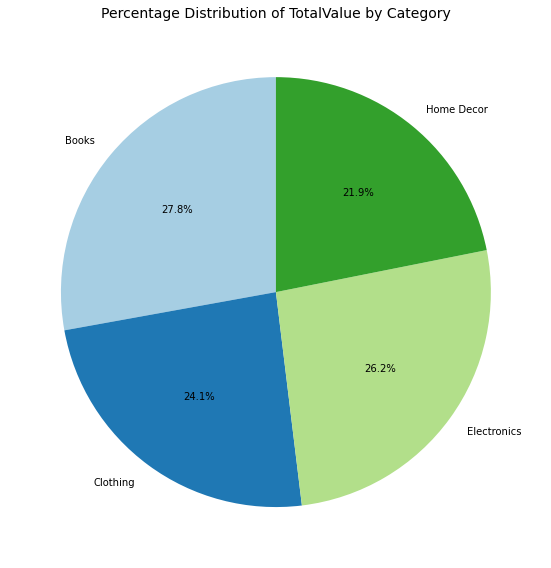

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(
    category_grouped['TotalValue'], 
    labels=category_grouped['Category'], 
    autopct='%1.1f%%',
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Percentage Distribution of TotalValue by Category', fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
# revenue generated by the region
region_grouped = df.groupby(['Region']).agg({
    'TotalValue': 'sum',
}).reset_index()
region_grouped

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


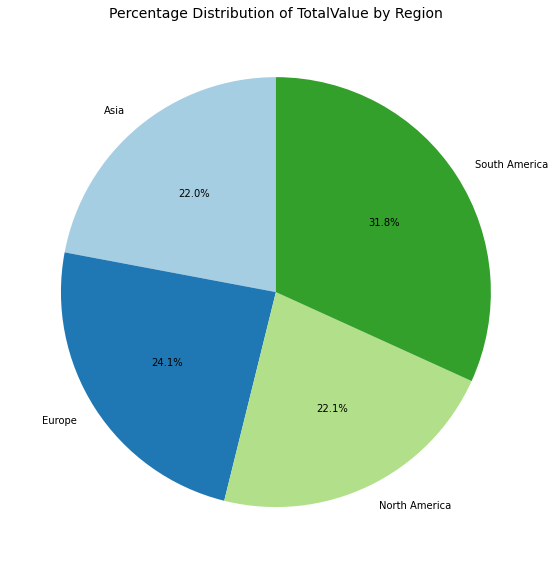

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(
    region_grouped['TotalValue'], 
    labels=region_grouped['Region'], 
    autopct='%1.1f%%',
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Percentage Distribution of TotalValue by Region', fontsize=14)
plt.tight_layout()
plt.show()

In [159]:
grouped_category = df.groupby(['Category', 'ProductName']).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

highest_by_value = grouped_category.loc[grouped_category.groupby('Category')['TotalValue'].idxmax()]
highest_by_quantity = grouped_category.loc[grouped_category.groupby('Category')['Quantity'].idxmax()]

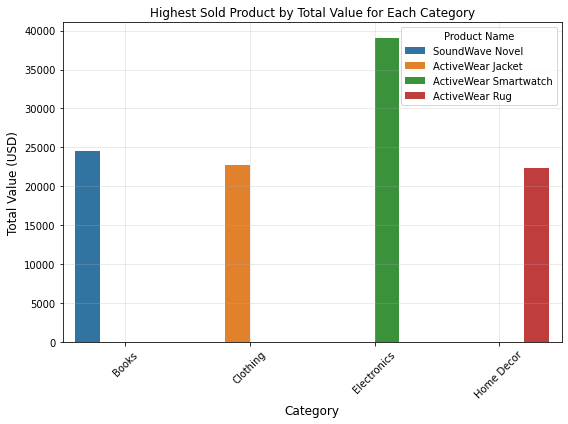

In [160]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='TotalValue', hue='ProductName', data=highest_by_value)
plt.title('Highest Sold Product by Total Value for Each Category')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

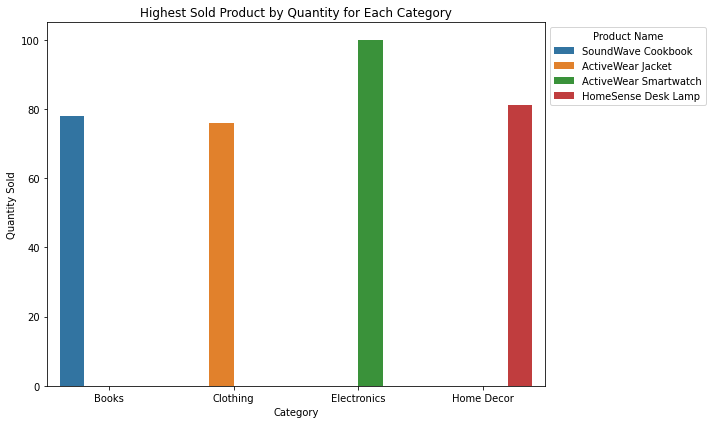

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Quantity', hue='ProductName', data=highest_by_quantity)
plt.title('Highest Sold Product by Quantity for Each Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [167]:
lowest_by_value = grouped_category.loc[grouped_category.groupby('Category')['TotalValue'].idxmin()]
lowest_by_quantity = grouped_category.loc[grouped_category.groupby('Category')['Quantity'].idxmin()]

,Category,ProductName,TotalValue,Quantity
8,Books,SoundWave Cookbook,15102.72,78
15,Clothing,ActiveWear Jacket,22712.56,76
33,Electronics,ActiveWear Smartwatch,39096.97,100
59,Home Decor,HomeSense Desk Lamp,15701.32,81


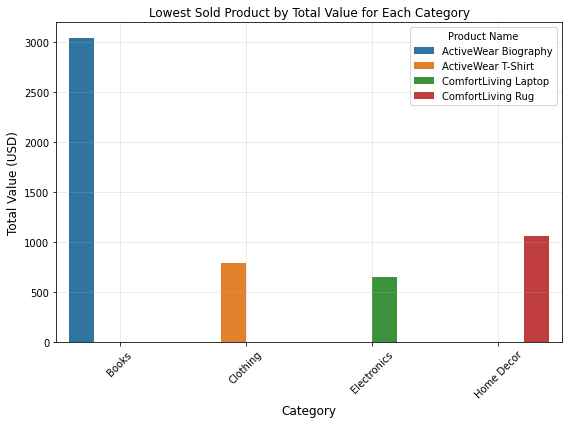

In [164]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='TotalValue', hue='ProductName', data=lowest_by_value)
plt.title('Lowest Sold Product by Total Value for Each Category')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

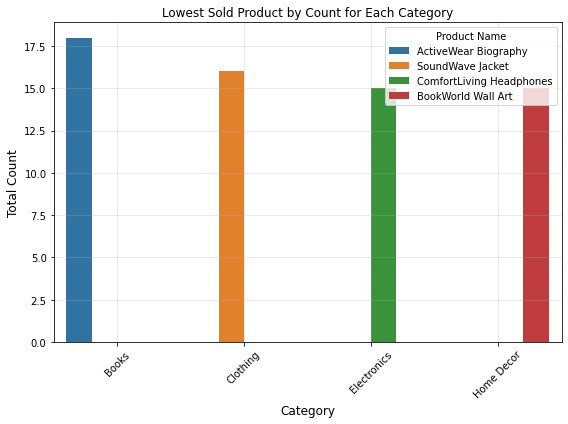

In [170]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Quantity', hue='ProductName', data=lowest_by_quantity)
plt.title('Lowest Sold Product by Count for Each Category')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
grouped_region = df.groupby(['Region', 'ProductName']).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

region_wise_topVal = grouped_region.loc[grouped_region.groupby('Region')['TotalValue'].idxmax()]
region_wise_topQunt = grouped_region.loc[grouped_region.groupby('Region')['Quantity'].idxmax()]

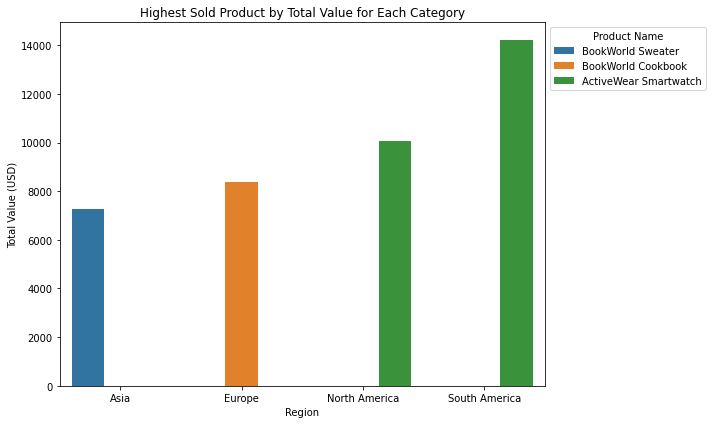

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', hue='ProductName', data=region_wise_topVal)
plt.title('Highest Sold Product by Total Value for Each Category')
plt.xlabel('Region')
plt.ylabel('Total Value (USD)')
plt.legend(title='Product Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

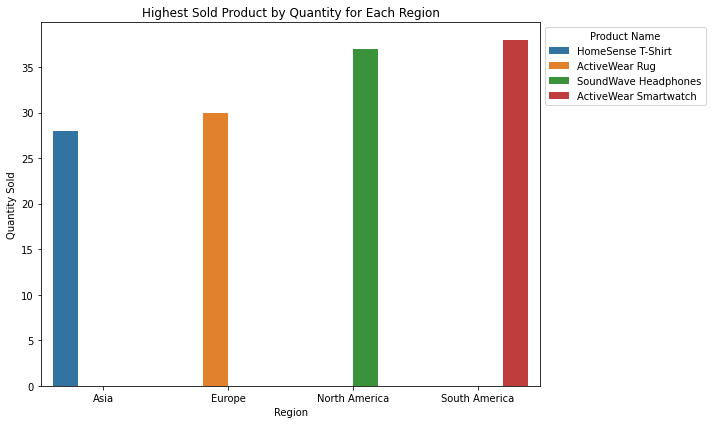

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Quantity', hue='ProductName', data=region_wise_topQunt)
plt.title('Highest Sold Product by Quantity for Each Region')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94,2024-10
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-07
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-06
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-09


In [76]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94,2024-10
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-07
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-06
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-09


In [99]:
Product_grouped = df.groupby(['ProductName']).agg({
    'TotalValue':'sum'
}).reset_index()

In [100]:
top_5_product = Product_grouped.sort_values('TotalValue', ascending=False).head(5)

In [101]:
top_5_product

,ProductName,TotalValue
9,ActiveWear Smartwatch,39096.97
47,SoundWave Headphones,25211.64
52,SoundWave Novel,24507.90
4,ActiveWear Jacket,22712.56
6,ActiveWear Rug,22314.43


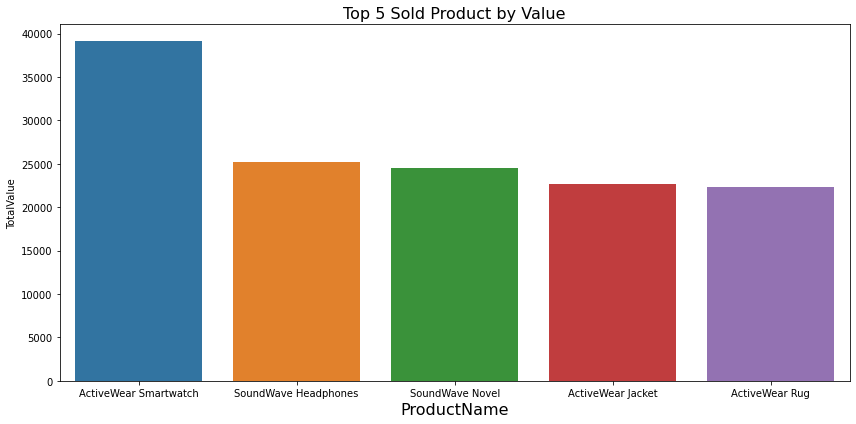

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='TotalValue', data=top_5_product, an)
plt.title('Top 5 Sold Product by Value',fontsize=16)
plt.xlabel('ProductName', fontsize=16)
plt.ylabel('TotalValue')
plt.tight_layout()
plt.show()

In [144]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94,2024-10
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-07
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-06
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82,2024-09


In [149]:
monthly_product_demand = df.groupby(['YearMonth', 'ProductID'])['Quantity'].sum().reset_index()

# Merge with the 'Products' DataFrame to get 'ProductName'
monthly_product_demand = monthly_product_demand.merge(df[['ProductID', 'ProductName']].drop_duplicates(), on='ProductID', how='left')

# Sort the values to get top products for each month
monthly_top_products = monthly_product_demand.sort_values(['YearMonth', 'Quantity'], ascending=[True, False])

# Optionally, get the top N products for each month (e.g., top 3 products)
top_n = 1
monthly_top_products = monthly_top_products.groupby('YearMonth').head(top_n)

# Display the result
print(monthly_top_products)

    YearMonth ProductID  Quantity             ProductName
0     2023-12      P020         4       ActiveWear Jacket
48    2024-01      P063        11           TechPro Novel
86    2024-02      P028        10     HomeSense Desk Lamp
151   2024-03      P054        11      SoundWave Cookbook
196   2024-04      P029        15      TechPro Headphones
296   2024-05      P097        11      BookWorld Cookbook
318   2024-06      P040        14  SoundWave Mystery Book
394   2024-07      P078        13           HomeSense Rug
443   2024-08      P054        12      SoundWave Cookbook
490   2024-09      P029        12      TechPro Headphones
588   2024-10      P096         9    SoundWave Headphones
610   2024-11      P054         7      SoundWave Cookbook
652   2024-12      P035        12      ActiveWear T-Shirt


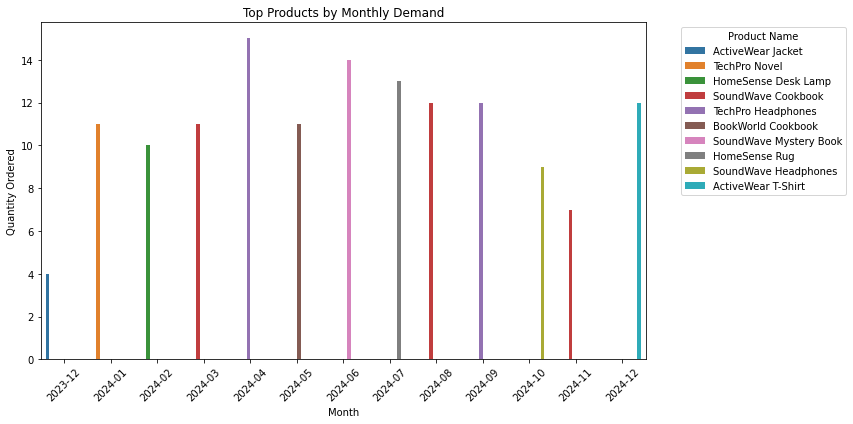

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(x='YearMonth', y='Quantity', hue='ProductName', data=monthly_top_products)
plt.title('Top Products by Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
C:\Users\dell\AppData\Local\Temp\ipykernel_29156\1518966620.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = filtered_product_demand_by_region.pivot('ProductName', 'Region', 'Quantity')


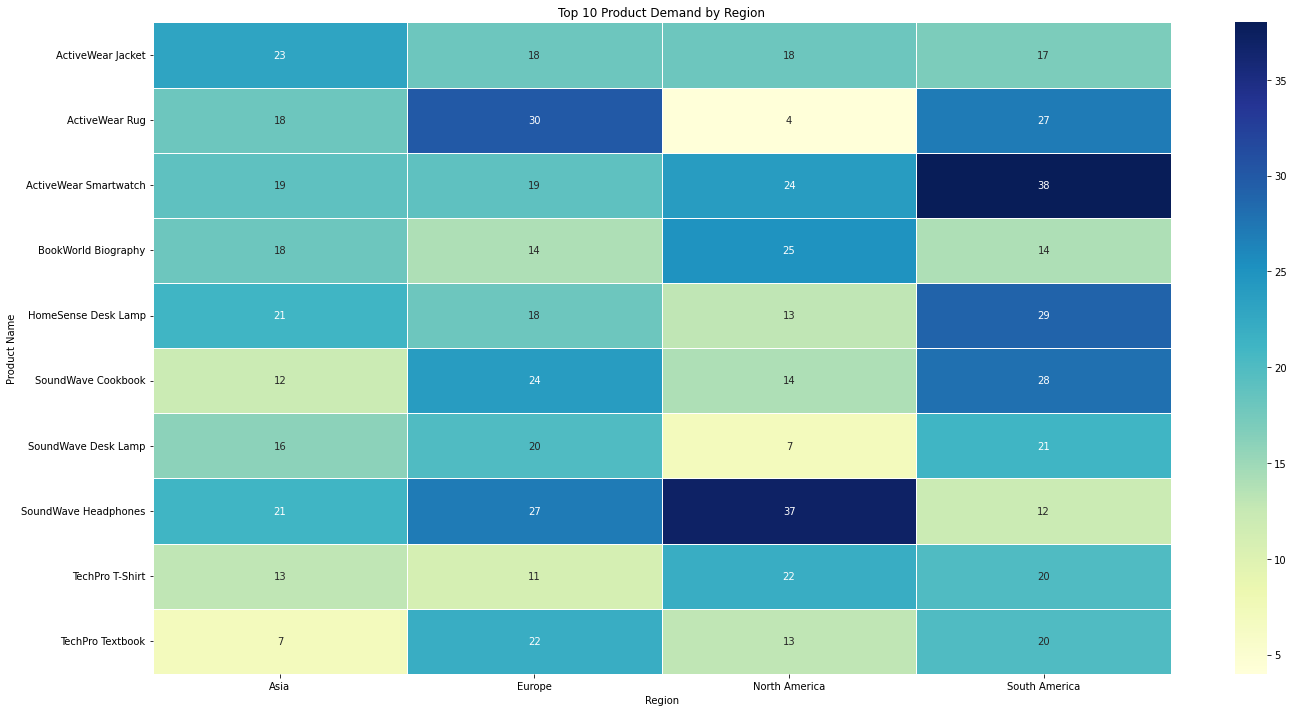

In [158]:
product_demand_by_region = df.groupby(['Region', 'ProductName']).agg({'Quantity': 'sum'}).reset_index()
top_10_products = product_demand_by_region.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).index

filtered_product_demand_by_region = product_demand_by_region[product_demand_by_region['ProductName'].isin(top_10_products)]

plt.figure(figsize=(20, 10))
pivot_data = filtered_product_demand_by_region.pivot('ProductName', 'Region', 'Quantity')
sns.heatmap(pivot_data, annot=True, fmt='g', cmap="YlGnBu", linewidths=0.5)
plt.title('Top 10 Product Demand by Region')
plt.ylabel('Product Name')
plt.xlabel('Region')
plt.tight_layout()
plt.show()